# CAPSTONE PROJECT - PREDICTING HOSPITAL READMISSION RATES

## Problem statement

The objective is to develop a predictive model that can accurately determine the likelihood of hospital readmission for patients within a specific period following their discharge. By employing classification algorithms—such as Logistic Regression, Decision Trees, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN)—the model will be trained on a labeled dataset. The labels in this dataset categorically indicate whether each patient experienced a readmission post-discharge. This model aims to assist healthcare providers in identifying at-risk patients, thereby enabling timely and targeted interventions to reduce readmission rates.

## Expected results: 

The target variable classifies patients into one of two categories:

- Readmitted: The patient will be readmitted to the hospital within the specified period.
- Not Readmitted: The patient will not be readmitted within the specified period.

## Expected techniques:

- Data Preprocessing: Handle missing values, encode categorical variables, and normalize/scale numerical features.
- Feature Engineering: Create meaningful features from raw data, such as the number of previous admissions, time since last admission, specific lab results, etc.
- Model Training: Use classification algorithms logistic regression, decision trees, SVM, or KNN to train a model on the labeled dataset where the label indicates whether the patient was readmitted.
- Prediction: Apply the trained model to test patient data to mimic future patient data to predict whether they are likely to be readmitted. ​
- Model Evaluation: Evaluate the model using appropriate metrics such as accuracy, precision, recall, F1 score.

## Why this question is important?

Patient readmission rates are an important indicator used by doctors and hospital administrators to assess the quality of care.  
Gaining better insight and prediction of readmission can be used at time of treatment to make better decisions whether a patient is ready to be released from the hospital and help the medical care providers improve the patient’s treatment plan during their stay.





In [3]:
# Standard libraries
import time
import warnings

# Data manipulation and mathematical libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # Setting the style for all plots

# Machine Learning: Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Machine Learning: Models
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Machine Learning: Model Selection and Validation
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

# Machine Learning: Metrics
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             mean_squared_error, precision_score, recall_score)

# Suppressing warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

print("All modules loaded")

All modules loaded


In [4]:
df = pd.read_csv('data/Patient_informationread_readmit.csv')

In [5]:
df.head()

,LOG_ID,MRN,DISCH_DISP,HOSP_ADMSN_TIME,HOSP_DISCH_TIME,LOS,ICU_ADMIN_FLAG,READMIT,SURGERY_DATE,BIRTH_DATE,...,SEX,PRIMARY_ANES_TYPE_NM,ASA_RATING_C,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME
0,bd16a67880da1e77,0000c7ccaa009343,Home Routine,24-Feb-19,24-Feb-19,0.0,No,1,24-Feb-19,39,...,Female,General,2.0,Inpatient,Hospital Inpatient Surgery,"CYSTOSCOPY, + URETEROSCOPY, RETROGRADE PYELOGR...",2/24/2019 8:58,2/24/2019 10:02,2/24/2019 8:59,2/24/2019 10:12
1,47fbfb9938d6067b,0000c7ccaa009343,Home Routine,31-Mar-19,1-Apr-19,1.0,No,0,31-Mar-19,39,...,Female,General,2.0,Outpatient,Hospital Outpatient Surgery,"CYSTOSCOPY, + URETEROSCOPY, RETROGRADE PYELOGR...",3/31/2019 16:01,3/31/2019 18:54,3/31/2019 16:02,3/31/2019 19:06
2,c6d3fc04767a6e36,0000e45237d1fc96,Home Routine,12-Feb-21,13-Feb-21,1.0,Yes,0,12-Feb-21,52,...,Male,General,NaN,Inpatient,Inpatient Admission,"IRRIGATION AND DEBRIDEMENT, KNEE",NaN,NaN,NaN,NaN
3,611e9c50425dbf55,0000e45237d1fc96,Home Routine,12-Feb-21,13-Feb-21,1.0,Yes,0,13-Feb-21,52,...,Male,General,3.0,Inpatient,Inpatient Admission,"IRRIGATION AND DEBRIDEMENT, KNEE",2/13/2021 7:11,2/13/2021 9:03,2/13/2021 7:11,2/13/2021 9:06
4,be9a505e236e5b67,000181ce0ebf1e12,Home Routine,6-Jul-23,7-Jul-23,1.0,No,0,6-Jul-23,31,...,Male,General,2.0,Inpatient,Hospital Inpatient Surgery,"THYROIDECTOMY, TOTAL",7/6/2023 10:13,7/6/2023 15:45,7/6/2023 10:13,7/6/2023 16:20


### Understanding the Features


Examine the data descriptions and features




In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65728 entries, 0 to 65727
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LOG_ID                65728 non-null  object 
 1   MRN                   65728 non-null  object 
 2   DISCH_DISP            65721 non-null  object 
 3   HOSP_ADMSN_TIME       65728 non-null  object 
 4   HOSP_DISCH_TIME       65714 non-null  object 
 5   LOS                   65714 non-null  float64
 6   ICU_ADMIN_FLAG        65728 non-null  object 
 7   READMIT               65728 non-null  int64  
 8   SURGERY_DATE          65728 non-null  object 
 9   BIRTH_DATE            65728 non-null  int64  
 10  HEIGHT                52695 non-null  object 
 11  WEIGHT                63319 non-null  float64
 12  SEX                   65728 non-null  object 
 13  PRIMARY_ANES_TYPE_NM  65168 non-null  object 
 14  ASA_RATING_C          58758 non-null  float64
 15  PATIENT_CLASS_GROUP

### FEATURE DESCRIPTION AND RELEVANCE

- HEIGHT and WEIGHT independantly may not be valuable patient data, but these features can be used to compute the BMI index of the patient which may better predict a health risk. The BMI formula is:

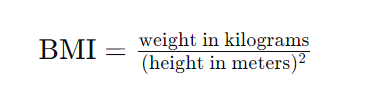

In [13]:
# convert WEIGHT column from ounces to pounds 

df['WEIGHT'] = df['WEIGHT'] / 16


In [15]:
# Define a function to convert height from "feet'inches" to total inches
def convert_height(height):
    try:
        feet, inches = height.split("'")
        if inches:  # Check if inches part is not empty
            inches = inches.replace('"', '').strip()
        else:
            inches = '0'  # Default to 0 inches if no inches part is present
        total_inches = int(feet) * 12 + int(inches)
        return total_inches
    except ValueError:
        return None  # Return None if there is a format problem




In [17]:
# Ensure the HEIGHT column is treated as a string and apply the function
df['HEIGHT'] = df['HEIGHT'].astype(str).apply(convert_height)

# Calculate BMI and store it in a new column "BMI", ensuring no division by zero or None values
df['BMI'] = df.apply(lambda row: 703 * row['WEIGHT'] / (row['HEIGHT'] ** 2) if row['HEIGHT'] else None, axis=1)

# Display the DataFrame to see the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65728 entries, 0 to 65727
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LOG_ID                65728 non-null  object 
 1   MRN                   65728 non-null  object 
 2   DISCH_DISP            65721 non-null  object 
 3   HOSP_ADMSN_TIME       65728 non-null  object 
 4   HOSP_DISCH_TIME       65714 non-null  object 
 5   LOS                   65714 non-null  float64
 6   ICU_ADMIN_FLAG        65728 non-null  object 
 7   READMIT               65728 non-null  int64  
 8   SURGERY_DATE          65728 non-null  object 
 9   BIRTH_DATE            65728 non-null  int64  
 10  HEIGHT                50745 non-null  float64
 11  WEIGHT                63319 non-null  float64
 12  SEX                   65728 non-null  object 
 13  PRIMARY_ANES_TYPE_NM  65168 non-null  object 
 14  ASA_RATING_C          58758 non-null  float64
 15  PATIENT_CLASS_GROUP

### FEATURE DESCRIPTION AND RELEVANCE (cont.)

- MRN and LOG_ID are ID numbers do not contribute to model prediction.
- HOSP_ADMSN_TIME, HOSP_DISCH_TIME, IN_OR_DTTM, OUT_OR_DTTM, AN_START_DATETIME, SURGERY_DATE, and AN_STOP_DATETIME provide admission, operating room and anastesia start and stop dates and times.  These start dates are often the same, giving little additional insight to predicting a readmission.  
- WEIGHT and HEIGHT were used to generate BMI.  BMI has more relavance to evaluate patient health.
- These should be removed. 

In [20]:
#removal of unnecessary features. 

# List of columns to drop
columns_to_drop = ['MRN', 'LOG_ID', 'HOSP_ADMSN_TIME', 'HOSP_DISCH_TIME','IN_OR_DTTM', 'OUT_OR_DTTM', 'AN_START_DATETIME', 'DISCH_DISP','SURGERY_DATE','AN_STOP_DATETIME', 'PRIMARY_PROCEDURE_NM','PRIMARY_ANES_TYPE_NM', 'PATIENT_CLASS_GROUP','WEIGHT', 'HEIGHT']

# Drop the columns
df_new = df.drop(columns=columns_to_drop)


# Verify the new DataFrame
df_new.head(6)

,LOS,ICU_ADMIN_FLAG,READMIT,BIRTH_DATE,SEX,ASA_RATING_C,PATIENT_CLASS_NM,BMI
0,0.0,No,1,39,Female,2.0,Hospital Inpatient Surgery,26.542143
1,1.0,No,0,39,Female,2.0,Hospital Outpatient Surgery,NaN
2,1.0,Yes,0,52,Male,NaN,Inpatient Admission,29.896485
3,1.0,Yes,0,52,Male,3.0,Inpatient Admission,29.896485
4,1.0,No,0,31,Male,2.0,Hospital Inpatient Surgery,NaN
5,31.0,Yes,0,80,Male,NaN,Inpatient Admission,27.990980


## Exploratory Data Analysis (EDA) -Exploration:

⦁	remove spaces

⦁	make all lower case

⦁	remove or solve for missing value 

⦁	Remove redundant features that don't add value to the model or predicting the object

⦁		numerics and date conversion

⦁	cardinality for categorical data to see the counts of unique values, drop feature if too much cardinality

⦁	remove duplicates

⦁	convert to integer 


In [23]:
# Indentify where the missing values are

df_new.isna().sum()

LOS                    14
ICU_ADMIN_FLAG          0
READMIT                 0
BIRTH_DATE              0
SEX                     0
ASA_RATING_C         6970
PATIENT_CLASS_NM        0
BMI                 15164
dtype: int64

In [25]:
#checking to see percentage NaN values represent

df_new.isna().mean()*100 

LOS                  0.021300
ICU_ADMIN_FLAG       0.000000
READMIT              0.000000
BIRTH_DATE           0.000000
SEX                  0.000000
ASA_RATING_C        10.604309
PATIENT_CLASS_NM     0.000000
BMI                 23.070837
dtype: float64

In [27]:
#Although BMI NaN values make up 23.07% there are sufficient rows of data to drop rows with NaN values

# Drop rows where any column has NaN values
df_new_clean = df_new.dropna()

# Verify again to confirm no NaN values remain
print(df_new_clean.isna().sum())




LOS                 0
ICU_ADMIN_FLAG      0
READMIT             0
BIRTH_DATE          0
SEX                 0
ASA_RATING_C        0
PATIENT_CLASS_NM    0
BMI                 0
dtype: int64


In [29]:
# Function to calculate the percentage of 'missing' values in a column
def missing_percentage(column):
    return (column == 'NaN').mean() * 100

# Apply the function to each column
missing_percentages = df_new_clean.apply(missing_percentage)

print(missing_percentages)

LOS                 0.0
ICU_ADMIN_FLAG      0.0
READMIT             0.0
BIRTH_DATE          0.0
SEX                 0.0
ASA_RATING_C        0.0
PATIENT_CLASS_NM    0.0
BMI                 0.0
dtype: float64


In [31]:
df_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44818 entries, 0 to 65727
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LOS               44818 non-null  float64
 1   ICU_ADMIN_FLAG    44818 non-null  object 
 2   READMIT           44818 non-null  int64  
 3   BIRTH_DATE        44818 non-null  int64  
 4   SEX               44818 non-null  object 
 5   ASA_RATING_C      44818 non-null  float64
 6   PATIENT_CLASS_NM  44818 non-null  object 
 7   BMI               44818 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.1+ MB


In [33]:
## Change non-numeric Features to Integers

df_new_clean['BMI'] = df_new_clean['BMI'].astype(int)
df_new_clean['ASA_RATING_C'] = df_new_clean ['ASA_RATING_C'].astype(int)
df_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44818 entries, 0 to 65727
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LOS               44818 non-null  float64
 1   ICU_ADMIN_FLAG    44818 non-null  object 
 2   READMIT           44818 non-null  int64  
 3   BIRTH_DATE        44818 non-null  int64  
 4   SEX               44818 non-null  object 
 5   ASA_RATING_C      44818 non-null  int32  
 6   PATIENT_CLASS_NM  44818 non-null  object 
 7   BMI               44818 non-null  int32  
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 2.7+ MB


In [35]:
df = df_new_clean

In [37]:
#Check for cardinality - no obvious cardinality

for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")
    
    

Column: LOS
LOS
0.0      9211
1.0      6829
2.0      4082
3.0      3106
4.0      2528
         ... 
119.0       2
94.0        2
106.0       1
118.0       1
111.0       1
Name: count, Length: 118, dtype: int64


Column: ICU_ADMIN_FLAG
ICU_ADMIN_FLAG
No     22666
Yes    22152
Name: count, dtype: int64


Column: READMIT
READMIT
0    37001
1     7817
Name: count, dtype: int64


Column: BIRTH_DATE
BIRTH_DATE
61    1005
60    1003
63     991
65     988
59     984
      ... 
18     182
88     167
87     166
89     140
17      21
Name: count, Length: 74, dtype: int64


Column: SEX
SEX
Male      24242
Female    20576
Name: count, dtype: int64


Column: ASA_RATING_C
ASA_RATING_C
3    22668
2    13509
4     5687
1     2286
5      634
6       34
Name: count, dtype: int64


Column: PATIENT_CLASS_NM
PATIENT_CLASS_NM
Inpatient Admission            22417
Hospital Outpatient Surgery    12939
Hospital Inpatient Surgery      9462
Name: count, dtype: int64


Column: BMI
BMI
25    3387
24    3266
23    307

In [39]:
df.describe()

,LOS,READMIT,BIRTH_DATE,ASA_RATING_C,BMI
count,44818.000000,44818.000000,44818.000000,44818.000000,44818.000000
mean,8.371324,0.174417,54.124169,2.754027,27.370610
std,14.784473,0.379471,17.728891,0.797031,6.882588
min,0.000000,0.000000,17.000000,1.000000,8.000000
25%,1.000000,0.000000,40.000000,2.000000,23.000000
50%,3.000000,0.000000,56.000000,3.000000,26.000000
75%,9.000000,0.000000,68.000000,3.000000,31.000000
max,244.000000,1.000000,90.000000,6.000000,86.000000


In [41]:
#Remove Duplicates

sum(df.duplicated())

9199

In [43]:
sum_of_duplicates = sum(df.duplicated())
print(f"Number of duplicate rows: {sum_of_duplicates}")

Number of duplicate rows: 9199


In [45]:
df_nodup = df.drop_duplicates()

sum_of_duplicates = sum(df_nodup.duplicated())
print(f"Number of duplicate rows: {sum_of_duplicates}")

Number of duplicate rows: 0


In [47]:
df = df_nodup

In [49]:
df = df_nodup
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35619 entries, 0 to 65727
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LOS               35619 non-null  float64
 1   ICU_ADMIN_FLAG    35619 non-null  object 
 2   READMIT           35619 non-null  int64  
 3   BIRTH_DATE        35619 non-null  int64  
 4   SEX               35619 non-null  object 
 5   ASA_RATING_C      35619 non-null  int32  
 6   PATIENT_CLASS_NM  35619 non-null  object 
 7   BMI               35619 non-null  int32  
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 2.2+ MB


In [51]:
df['READMIT'].value_counts()

READMIT
0    28261
1     7358
Name: count, dtype: int64

#### The dataset is unbalanced, as only 7358 (21.77%) records are related with readmissions. 

### Imbalanced Features

In a healthcare dataset, suppose the feature "disease_presence" is highly imbalanced because very few patients have a rare disease. Despite the imbalance, this feature is critical for identifying high-risk patients. Techniques like resampling and appropriate evaluation metrics would help in effectively utilizing this imbalanced yet useful feature.

In [54]:
df.shape

(35619, 8)

In [56]:
df.READMIT.value_counts(normalize=True).round(2)

READMIT
0    0.79
1    0.21
Name: proportion, dtype: float64

Text(0.5, 0.98, 'Histograms Showing Distribution and Skew of the Features')

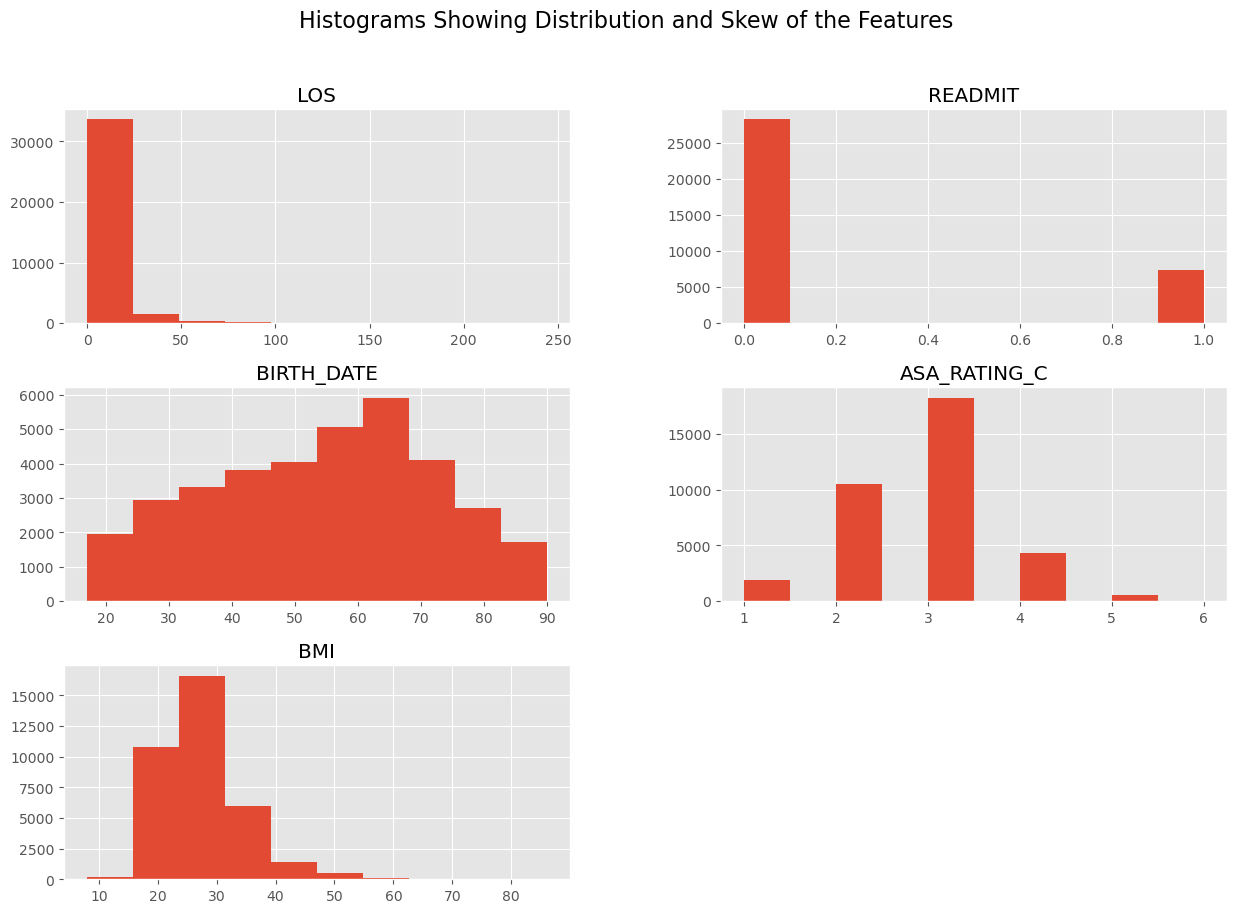

In [58]:
# plt.figure()
df.hist(figsize = (15,10));
plt.suptitle("Histograms Showing Distribution and Skew of the Features", fontsize=16)

#OR

#plt.style.use('default') # overrides the fiverthirthy eight
#df.hist(figsize = (15, 15), grid=False);

#right scue mean is greater that median


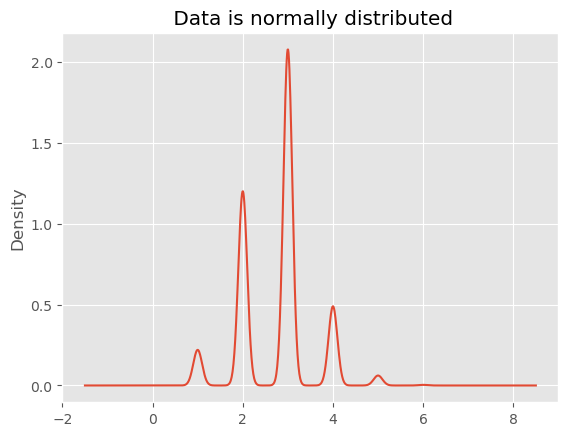

In [59]:
df['ASA_RATING_C'].plot(kind = 'kde', title = " Data is normally distributed");


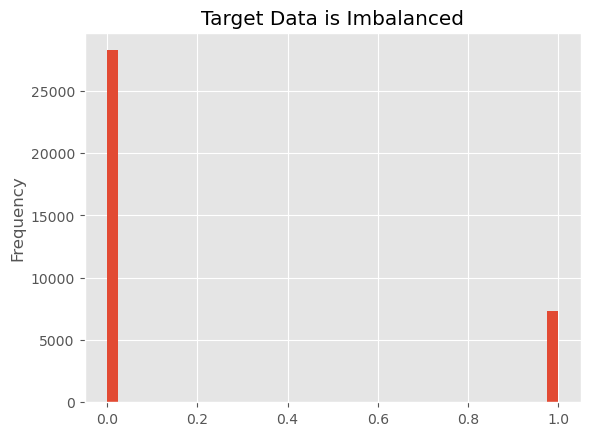

In [62]:
df['READMIT'].plot(kind = 'hist', bins = 40, title = "Target Data is Imbalanced");



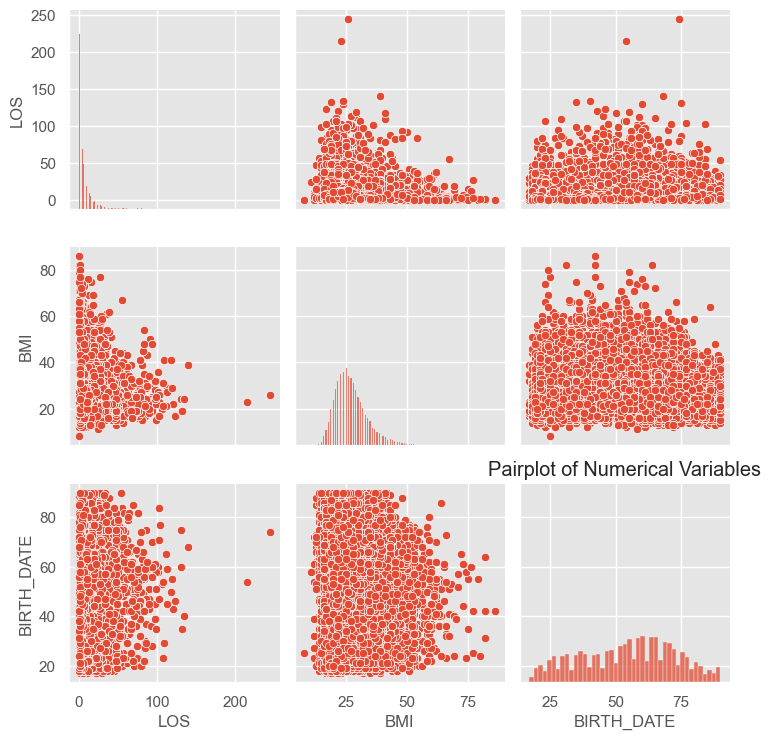

In [153]:
# Pairplot
sns.pairplot(df[['LOS', 'BMI', 'BIRTH_DATE']])
plt.title('Pairplot of Numerical Variables')
plt.tight_layout()
plt.show()

### Correlation

In [64]:
corr_matrix = df.corr(numeric_only=True).round(4)

In [66]:
target_corr = corr_matrix[['READMIT']].drop(['READMIT'])  
# Drop if you only want correlations with other features

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

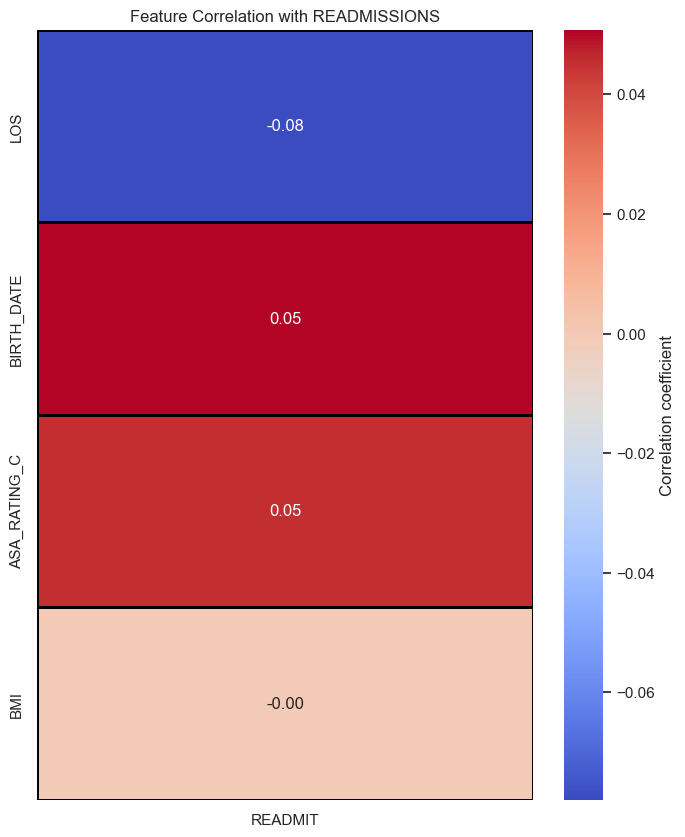

In [70]:
# Setting the seaborn style
sns.set(style="whitegrid")

# Create a heatmap
plt.figure(figsize=(8, 10))  # Adjust the size to fit all your features


heatmap = sns.heatmap(target_corr, 
                      annot=True, 
                      cmap='coolwarm', 
                      fmt='.2f', 
                      linewidths=1, 
                      linecolor='black', 
                      cbar_kws={'label': 'Correlation coefficient'})
plt.title('Feature Correlation with READMISSIONS')
plt.show()

In [72]:
corr = df.corr(numeric_only=True).round(4)
print(corr)  # Display the correlation matrix to check for NaN values

                 LOS  READMIT  BIRTH_DATE  ASA_RATING_C     BMI
LOS           1.0000  -0.0780     -0.0062        0.3183 -0.0495
READMIT      -0.0780   1.0000      0.0508        0.0454 -0.0004
BIRTH_DATE   -0.0062   0.0508      1.0000        0.3068 -0.0875
ASA_RATING_C  0.3183   0.0454      0.3068        1.0000  0.0443
BMI          -0.0495  -0.0004     -0.0875        0.0443  1.0000


### Data Pre-processing

In [75]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35619 entries, 0 to 65727
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LOS               35619 non-null  float64
 1   ICU_ADMIN_FLAG    35619 non-null  object 
 2   READMIT           35619 non-null  int64  
 3   BIRTH_DATE        35619 non-null  int64  
 4   SEX               35619 non-null  object 
 5   ASA_RATING_C      35619 non-null  int32  
 6   PATIENT_CLASS_NM  35619 non-null  object 
 7   BMI               35619 non-null  int32  
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 2.2+ MB


In [77]:
X = df.drop(columns = 'READMIT')
y = df['READMIT']

### Train/Test Split

With the data prepared, it is split it into a train and test set.

### Process and Method: 
- Fit on train data
- Transform the test data
- Using sklearn which combines these two above but only on the training data only. 
- Call the model
- Scale the data after running train/split




In [81]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

In [83]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(28495, 7)
(28495,)
(7124, 7)
(7124,)


In [85]:
# Apply one-hot encoding to the specified columns in the training data
X_train_encoded = pd.get_dummies(X_train, columns=['ICU_ADMIN_FLAG', 'SEX', 'PATIENT_CLASS_NM'])

# Apply one-hot encoding to the same specified columns in the test data
X_test_encoded = pd.get_dummies(X_test, columns=['ICU_ADMIN_FLAG', 'SEX', 'PATIENT_CLASS_NM'])



X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Convert all columns to integer type after alignment to handle any NaNs introduced by alignment
X_train_encoded = X_train_encoded.astype(int)
X_test_encoded = X_test_encoded.astype(int)

In [87]:
print(X_train_encoded)

       LOS  BIRTH_DATE  ASA_RATING_C  BMI  ICU_ADMIN_FLAG_No  \
30775    6          82             4   32                  1   
36773   15          66             3   32                  0   
13692    9          37             3   31                  0   
63435   30          51             5   26                  0   
61357   17          67             2   25                  0   
...    ...         ...           ...  ...                ...   
10980    7          27             2   31                  0   
38332    2          56             3   25                  0   
35087    7          52             2   24                  1   
25382    1          65             3   22                  0   
1474     2          62             2   36                  1   

       ICU_ADMIN_FLAG_Yes  SEX_Female  SEX_Male  \
30775                   0           1         0   
36773                   1           0         1   
13692                   1           1         0   
63435                   1  

In [89]:
print(X_test)

        LOS ICU_ADMIN_FLAG  BIRTH_DATE     SEX  ASA_RATING_C  \
17940  41.0            Yes          66    Male             3   
30386   1.0             No          52    Male             3   
36919   0.0             No          29  Female             2   
51694   0.0             No          38  Female             2   
9494    5.0            Yes          84    Male             3   
...     ...            ...         ...     ...           ...   
44732   4.0             No          69    Male             2   
12319   3.0            Yes          66    Male             3   
58541   2.0             No          68  Female             3   
30952  10.0            Yes          83  Female             3   
22409   2.0            Yes          69    Male             3   

                  PATIENT_CLASS_NM  BMI  
17940          Inpatient Admission   19  
30386   Hospital Inpatient Surgery   28  
36919  Hospital Outpatient Surgery   24  
51694  Hospital Outpatient Surgery   26  
9494    Hospital Inpa

### Standardization

In [92]:

scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transform the test data
X_test_scaled = scaler.transform(X_test_encoded)

# Optionally convert the scaled arrays back to DataFrame, if necessary, with proper column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)


### Converting to a Pandas Dataframe from numpy array

In [95]:
X_train_scaled2 = pd.DataFrame(X_train_scaled, columns = X_train_scaled.columns)



Text(0.5, 0.98, 'Comparing features before scaling which shows the data needs to be scaled')

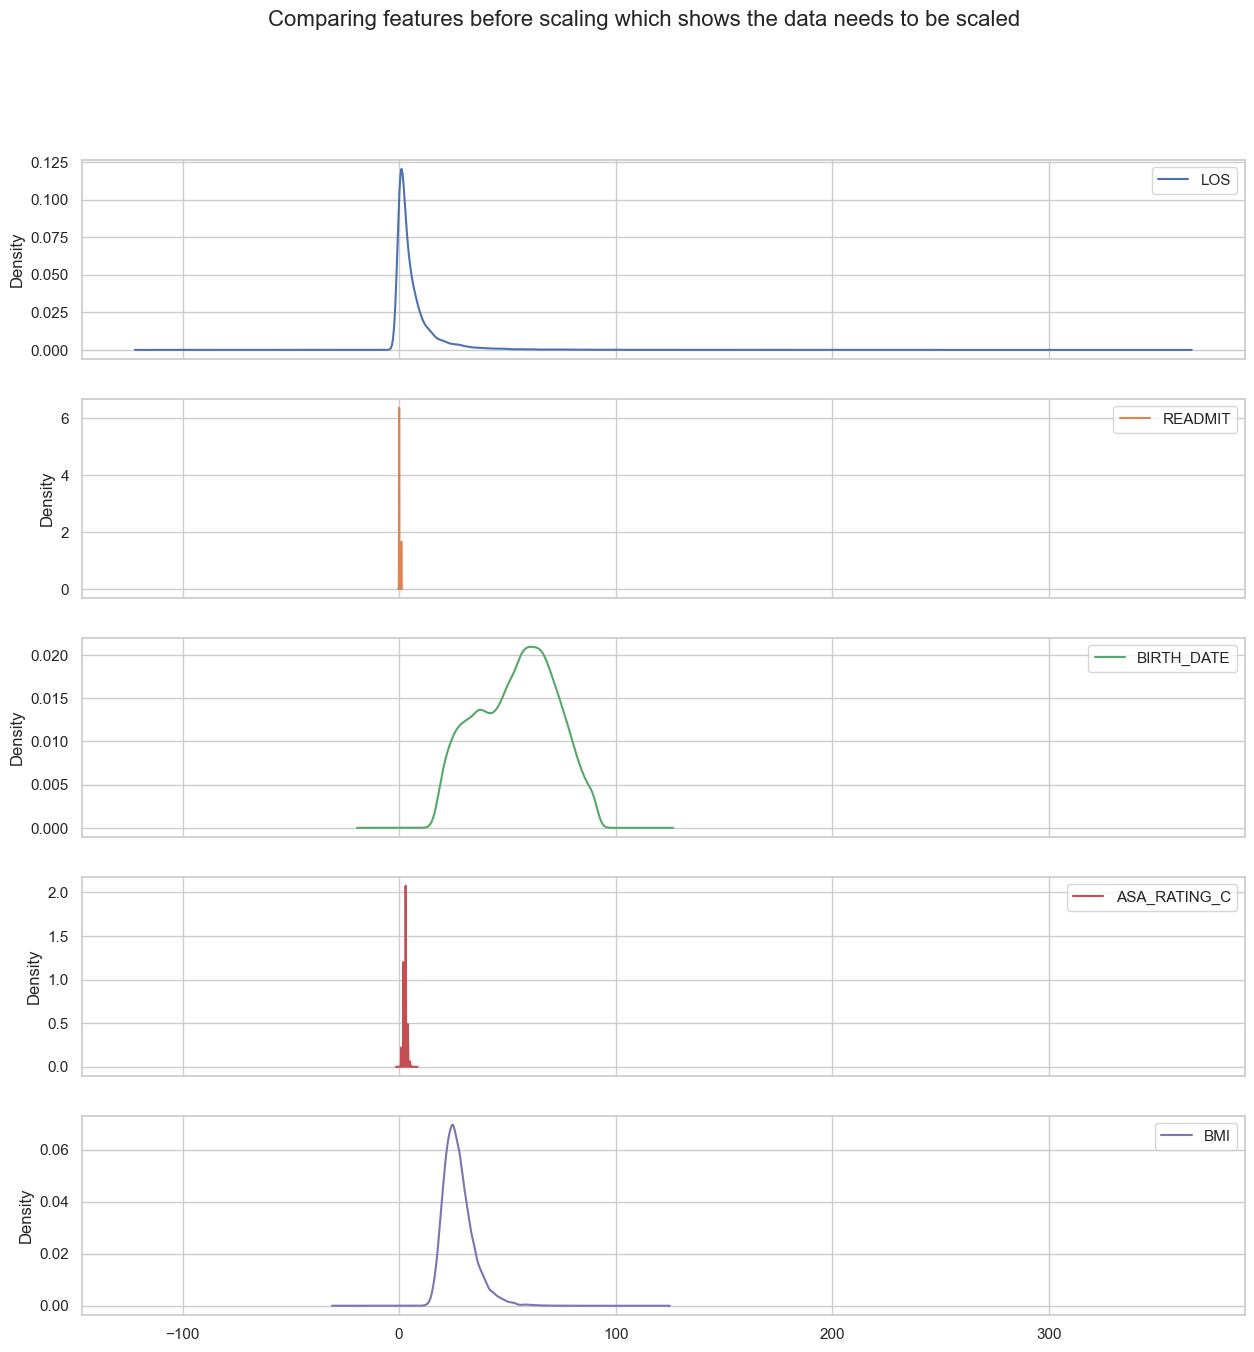

In [97]:
#Looking at features before scaling:

df.plot(kind = 'kde', figsize = (15, 15), subplots = True, title = "Comparing features before scaling which shows the data needs to be scaled");
plt.suptitle("Comparing features before scaling which shows the data needs to be scaled", fontsize=16)

Text(0.5, 0.98, 'Comparing features after scaling - data has been successfully scaled')

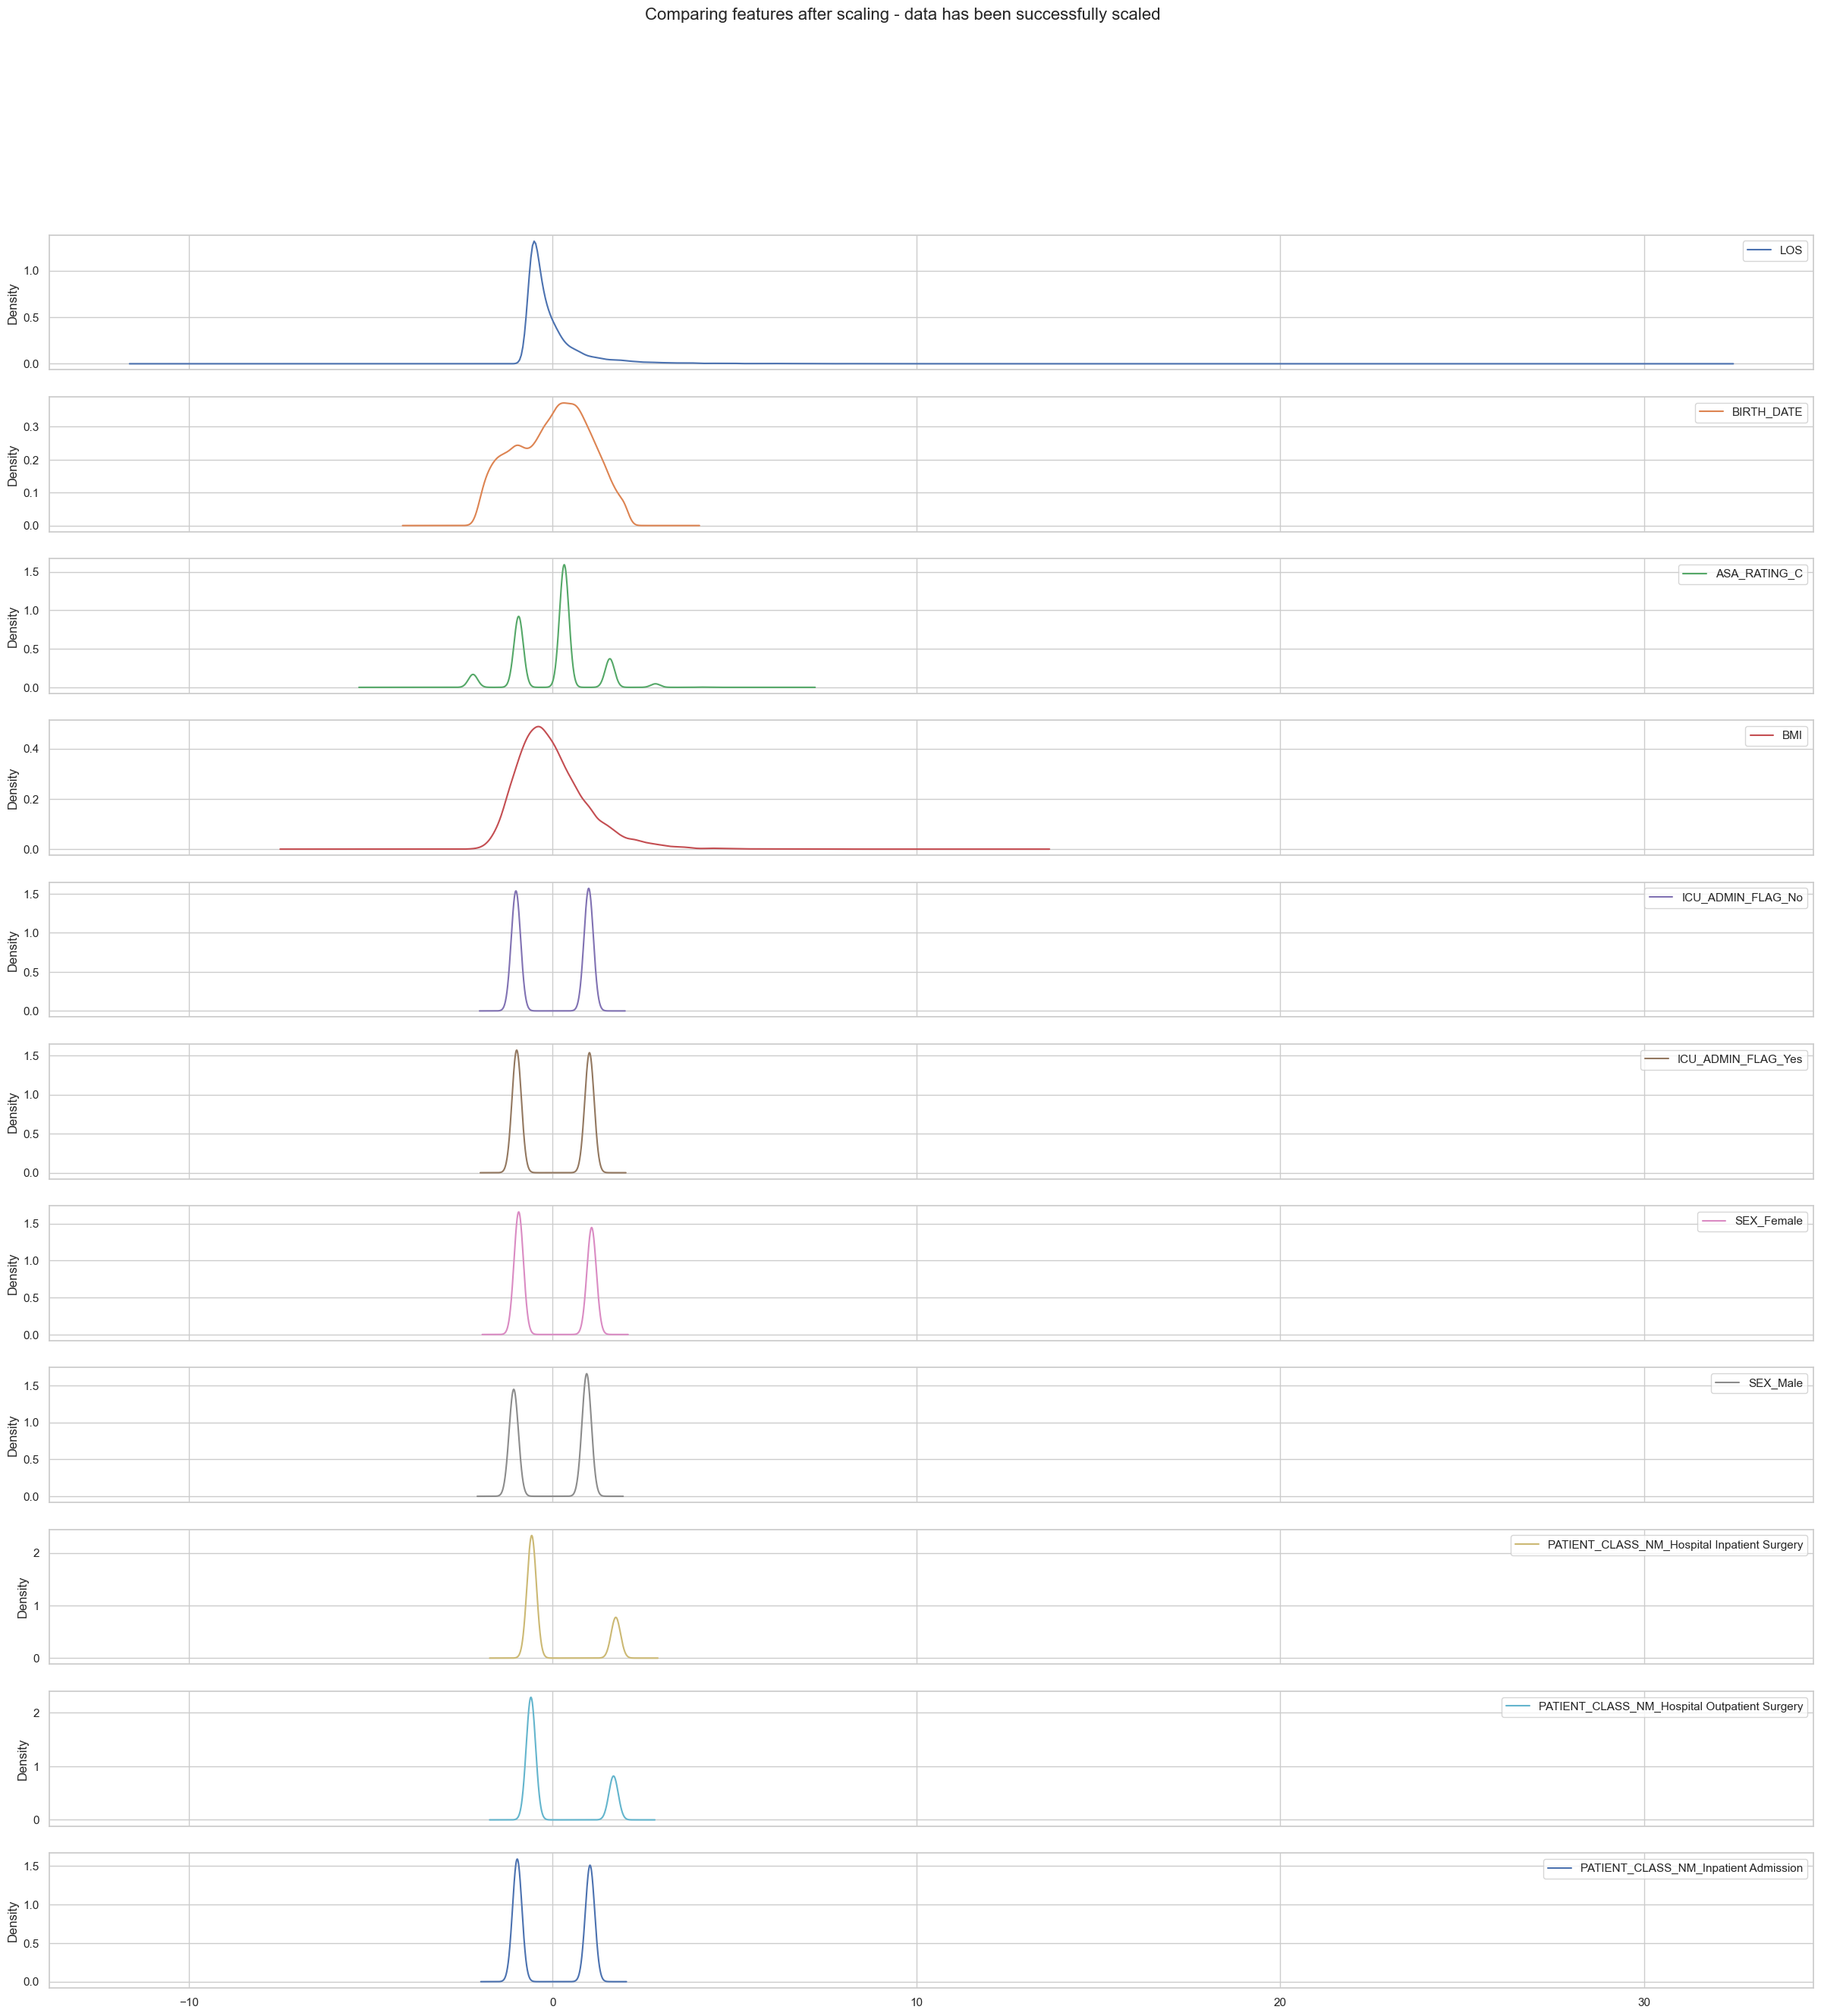

In [99]:
#Looking at features after scaling:
X_train_scaled.plot(kind = 'kde', subplots = True, figsize= (30,30));
plt.suptitle("Comparing features after scaling - data has been successfully scaled", fontsize= 16)



In [101]:
# to verify data is successfully scaled: mean should be 0 and std should be 1. 
X_train_scaled.agg(['mean', 'std']).round(1)


,LOS,BIRTH_DATE,ASA_RATING_C,BMI,ICU_ADMIN_FLAG_No,ICU_ADMIN_FLAG_Yes,SEX_Female,SEX_Male,PATIENT_CLASS_NM_Hospital Inpatient Surgery,PATIENT_CLASS_NM_Hospital Outpatient Surgery,PATIENT_CLASS_NM_Inpatient Admission
mean,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### The data has been successfully scaled

### A Baseline Model

Before building the first model, I will establish a baseline.  

### Build a dummy model

In [106]:
dummy = DummyClassifier(strategy= "prior")

In [108]:
# fit the mdel 
dummy.fit(X_train, y_train)

# accuracy score
print("The accuracy of the dummy classifier for train is {:.2%}".format(dummy.score(X_train, y_train)))
print("The accuracy of the dummy classifier for test is {:.2%}".format(dummy.score(X_test, y_test)))

The accuracy of the dummy classifier for train is 79.28%
The accuracy of the dummy classifier for test is 79.59%


### Baseline Performance to Exceed:


| Dummy Classifier          | Accuracy                                   |
|---------------------------|--------------------------------------------|
| Train                     | 79.28%                                     |
| Test                      | 79.59%                                     |

In [111]:
np.sum([y_test == 1])

1454

In [113]:
np.sum([y_test == 0])

5670

## Applying models

### A Logistic Regression Model

Using Logistic Regression to build a basic model on the data.  

In [117]:
X_train_scaled , X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

In [119]:
# calling the object
lg = LogisticRegression()

# fitting the model 
lg.fit(X_train_encoded,y_train)

# train score
print(f"The accuracy on the train data is : {lg.score(X_train_encoded, y_train):.2f}")

# data viz the classification
# plot_classifier(X_train_encoded, y_train, lg)

The accuracy on the train data is : 0.79


### Logistic Regression Model Accuracy: 


| Logistic Regression         | Accuracy                                   |
|-----------------------------|--------------------------------------------|
| Train                       | 79.00%                                     |


In [122]:
def plot_classifier(X, y, model):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = plt.cm.RdYlBu
    cmap_bold = ['#FF0000', '#0000FF']

    # We create an instance of Neighbours Classifier and fit the data.
    model.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=20)
    plt.title("Classification boundaries")
    plt.show()

### Confusion Matrix


In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

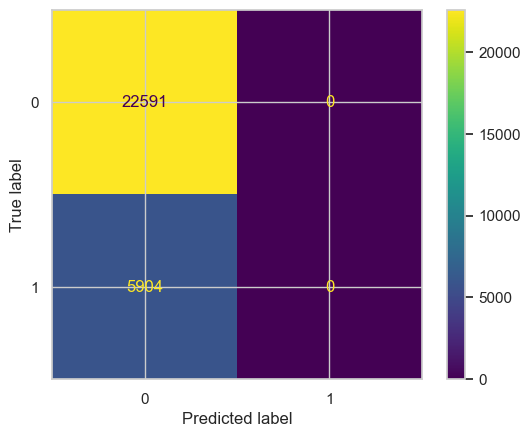

In [127]:
train_predictions = lg.predict(X_train_encoded)

# generate the confusion matrix
cm = confusion_matrix(y_train, train_predictions, labels = lg.classes_)

# display 
disp = ConfusionMatrixDisplay(confusion_matrix= cm,display_labels= lg.classes_)

# show the plot
disp.plot()
plt.show()

## Confusion Matrix Evaluation

#### The confustion matrix show 0 false predictions which may indicate overfitting. Further attention will need to be spent to evaluate the accuracy of the confusion matrix or if the model is truly overfit. 

#### The cost or risk of a false negative is high given that a patient's health and the hospital's liability are at stake. 


## Coefficients

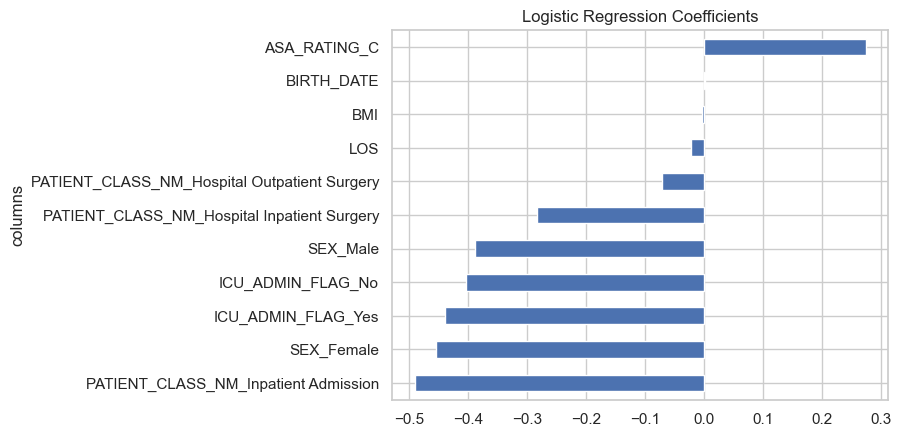

In [133]:
coefficients = lg.coef_[0] # the [0] is to extract the values in single array

# Generate labels for the coefficients
labels = X_train_encoded.columns.tolist()

# converting into df 
lr_results = pd.DataFrame({"columns": labels, "values" : coefficients}).sort_values(by = "values")

# bar plot
lr_results.plot(kind = 'barh', x = 'columns', y = 'values', legend = False);

# Adding labels and title to the plot
plt.title('Logistic Regression Coefficients')

# Display the plot
plt.show()

### Interpretation

- The negative value means it decreases the log odds of readmission. So being an Inpatient Admission has a strong effect on reducing the likelihood of readmission.
- The positive values means it increases the log odds of readmission.  The ASA_RATING_C has a strong effect on increasing the likelihood of readmission.

### Model Performance and Model Comparisons

Logistic Regression model will be compared with the KNN algorithm, Decision Tree, and SVM models using the default settings for each of the models, fit, score, and time of each.  Findings will be arranged in the following matrix format. 

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### KNN  - can lend to overfitting and not good at generalization

In [140]:
#when using KNN need to use a standard scaler
# call the model 
knn = KNeighborsClassifier()

# fit the model 
knn.fit(X_train_encoded, y_train)

# train score
print(f"The accuracy on the train data is : {knn.score(X_train_encoded, y_train):.2f}")

# plot the classification
# plot_classifier(X_train_encoded, y_train, knn)

The accuracy on the train data is : 0.81


### KNN Model Results

In [143]:
print("The accuracy score of the model for Train is {:.2f}".format(knn.score(X_train_encoded, y_train)))

The accuracy score of the model for Train is 0.81


In [144]:
print("The accuracy score of the model for test is {:.2f}".format(knn.score(X_test_encoded, y_test)))

The accuracy score of the model for test is 0.76


In [145]:
# train_predictions = knn.predict(x_train)

### KNN Model Accuracy: 


| KNN                         | Accuracy                                   |
|-----------------------------|--------------------------------------------|
| Train                       | 81.00%                                     |

### Sklearn Metrics

In [151]:
from sklearn.metrics import precision_score

In [153]:
precision_score(y_train, train_predictions, average='macro')

0.3964028776978417

### Decision Trees model using DecisionTreeClassifier

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
# call the model 
dt = DecisionTreeClassifier()

# fit the model 
dt.fit(X_train_encoded, y_train)

# train score
print(f"The accuracy on the train data is : {dt.score(X_train_encoded, y_train):.2f}")

# plot the classification
# plot_classifier(X_train_encoded, y_train, dt)

The accuracy on the train data is : 0.95


In [160]:
print("The accuracy score of the model for Train is {:.2f}".format(dt.score(X_train_encoded, y_train)))

The accuracy score of the model for Train is 0.95


In [162]:
print("The accuracy score of the model for test is {:.2f}".format(dt.score(X_test_encoded, y_test)))

#typically the test score will be worse that the train due to overfitting, does not do well to generalize teh data

The accuracy score of the model for test is 0.65


### Decision Tree Model Accuracy: 


| Decision Tree               | Accuracy                                   |
|-----------------------------|--------------------------------------------|
| Train                       | 95.00%                                     |

### Random Forest Classifier

In [166]:
# call the model 
rf = RandomForestClassifier()

# fit the model
rf.fit(X_train_encoded, y_train)

# train score
print(f"The accuracy on the train data is : {rf.score(X_train_encoded, y_train):.2f}")

# plot the decision boundary
# plot_classifier(X_train_encoded, y_train, rf)

The accuracy on the train data is : 0.95


In [168]:
print("The accuracy score of the model for Train is {:.2f}".format(rf.score(X_train_encoded, y_train)))

The accuracy score of the model for Train is 0.95


In [170]:
print("The accuracy score of the model for test is {:.2f}".format(rf.score(X_test_encoded, y_test)))

The accuracy score of the model for test is 0.72


### Random Forest Classifier Model Accuracy: 


| Random Forest Classifier    | Accuracy                                   |
|-----------------------------|--------------------------------------------|
| Train                       | 95.00%                                     |

#### Next conduct hyper-parameter tuning to find the best tuning 
- random forest can be improved with hyperparameter tuning by deciding which columns are important.  
- Random forest may be able to capture linear regression relationships better that logistic regression. 


### SVM

In [175]:
# intiate 
scaler = StandardScaler()

# fit and transform 
X_train_encoded = scaler.fit_transform(X_train_encoded)

In [177]:
#Convert the numpy array into pandas df
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)

In [179]:
# call the model (on unscaled data)
svc = SVC() #Default hyperparameters

# fit the model 
svc.fit(X_train_encoded,y_train)

# score the model 
print("The accuracy of the SVM for train is {:.2%}".format(svc.score(X_train_encoded, y_train)))
print("The accuracy of the SVM for test is {:.2%}".format(svc.score(X_test_encoded, y_test)))

The accuracy of the SVM for train is 79.29%
The accuracy of the SVM for test is 79.59%


SVM Model Accuracy: 


| SVM                         | Accuracy                                   |
|-----------------------------|--------------------------------------------|
| Train                       | 79.29%                                     |
| Test                        | 79.59%                                     |

### Tuning the model and applying GridSearch

* GridSearch is used to change: Kernels, C values, gamma values
* within polynomial kernels there can also have change in the degree



In [181]:
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = range(1, 10, 2)
degree_range = range(1, 5)
max_iter_range = [-1, 1, 2]

# putting it togther
grid = dict(kernel = kernel_range, C = C_range, degree = degree_range, max_iter = max_iter_range)

In [183]:
grid

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'C': range(1, 10, 2),
 'degree': range(1, 5),
 'max_iter': [-1, 1, 2]}

In [185]:
# Models to compare
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNearestNeighbors': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier()
}

In [187]:
# Dictionary to store results
results = {}

In [189]:
# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_encoded, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test_encoded)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    results[name] = {
        'train_time': train_time,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    }

In [191]:
# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Training Time: {metrics['train_time']:.4f} seconds")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print("\n")

Model: LogisticRegression
Training Time: 0.0190 seconds
Accuracy: 0.5978
Precision: 0.5496
Recall: 0.5742


Model: KNearestNeighbors
Training Time: 0.0558 seconds
Accuracy: 0.6655
Precision: 0.4767
Recall: 0.4774


Model: SVC
Training Time: 33.3366 seconds
Accuracy: 0.7959
Precision: 0.3980
Recall: 0.5000


Model: DecisionTree
Training Time: 0.0780 seconds
Accuracy: 0.7351
Precision: 0.4603
Recall: 0.4815




| Model              | Training Time (seconds) | Accuracy | Precision | Recall  |
|--------------------|-------------------------|----------|-----------|---------|
| LogisticRegression | 0.0190                  | 0.5978   | 0.5496    | 0.5742  |
| KNearestNeighbors  | 0.0558                  | 0.6655   | 0.4767    | 0.4774  |
| SVC                | 33.3366                 | 0.7959   | 0.3980    | 0.5000  |
| DecisionTree       | 0.0780                  | 0.7351   | 0.4603    | 0.4815  |



#### Improving the Model

Now that I have provided some basic models and results, next we can to try to improve these by considering the following:
- More feature engineering and exploration.  For example, should we keep the BMI feature? 
- Hyperparameter tuning and grid search.  All of the models used here have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjustments to the performance metric can also be further explored

### Hyperparameter Tuning

In [194]:
# Choose the model to optimize based on the desired metric (e.g., 'accuracy')
chosen_metric = 'accuracy'
best_model_name = max(results, key=lambda x: results[x][chosen_metric])
best_model = models[best_model_name]
print(best_model)

SVC()


In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {}
if best_model_name == 'LogisticRegression':
    param_grid = {'C': [0.1, 1, 10, 100]}
elif best_model_name == 'KNearestNeighbors':
    param_grid = {'n_neighbors': [2, 3, 7, 9]}
elif best_model_name == 'SVC':
    param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(best_model, param_grid, scoring=chosen_metric, cv=5)
grid_search.fit(X_train_encoded, y_train)

In [ ]:
# Print best parameters and corresponding performance
print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best {chosen_metric.capitalize()}: {grid_search.best_score_:.4f}")

In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nFinal Model Evaluation on Test Set")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")

In [ ]:
# Convert the results dictionary to a DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index')

# Display the DataFrame
print(df_results)

## Recommendations

### Model Performance


### Model Stability and Generalization:



### Training Time Consideration:


### Final Recommendation:



